In [2]:
import SimulacaoCalc as sc
import numpy as np
import re
import json
import pickle
import csv
import pandas
import seaborn
import Regressor


c:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [112]:
sim=sc.SimulationOps(r'C:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\DWSIMSIMS\HidrogenaçãoCO2A.hsc')
with open(file=r'C:\Users\LuanNogueira\Downloads\Ic-Metamodelagem\pibicvenv\Lib\site-packages\lhs_sampling1.pickle',mode='rb') as file:
    samples=pickle.load(file)
random_samples=np.array([samples.reshape(-1,6)[i] for i in np.random.randint(0,3999,400)])
sim.sampling_sim(random_samples,r'Xdadosrandom1.csv',r'ydadosrandom1.csv')

OK
OK
OK


AttributeError: Open.Close

In [15]:
X=pandas.DataFrame(pandas.read_csv(r'Xdados5e.csv',header=None))
X_random=pandas.DataFrame(pandas.read_csv(r'Xdadosrandom1.csv',header=None))
y=pandas.DataFrame(pandas.read_csv(r'ydados5e.csv',header=None))
y_random=pandas.DataFrame(pandas.read_csv(r'ydadosrandom1.csv',header=None))
X=X.drop([6],axis=1)
X_random=X_random.drop([6],axis=1)
y_random.drop(index=y_random.loc[(X_random.duplicated()==True)].index,inplace=True)
X_random.drop_duplicates(inplace=True)


X_random.reset_index(drop=True,inplace=True)
y_random.reset_index(drop=True,inplace=True)
index=[]
index_r=[]
for k,i in enumerate(X_random[0]):
    for l,j in enumerate(X[0]):
        if j == i:
            index.append(l)
            index_r.append(k)
y=y.loc[index]
X=X.loc[index]
X_random=X_random.loc[index_r]
y_random=y_random.loc[index_r]
X.reset_index(drop=True,inplace=True)
X_random.reset_index(drop=True,inplace=True)
y_random.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
index_to_drop=y.loc[y[2]==False].index
X_random.drop(index=index_to_drop,inplace=True)
X.drop(index=index_to_drop,inplace=True)
y_random.drop(index=index_to_drop,inplace=True)
y.drop(index=index_to_drop,inplace=True)
X.reset_index(drop=True,inplace=True)
X_random.reset_index(drop=True,inplace=True)
y_random.reset_index(drop=True,inplace=True)
y.reset_index(drop=True,inplace=True)
y_random.drop(labels=[1,2],axis=1,inplace=True)
y.drop(labels=[1,2],axis=1,inplace=True)
X=X.set_axis(['Temperatura de reação','Vazão molar de Hidrogênio','Razão de purga','Razão de refluxo','Volume do reator','Pressão de reação'],axis=1)
X_random=X_random.set_axis(['Temperatura de reação','Vazão molar de Hidrogênio','Razão de purga','Razão de refluxo','Volume do reator','Pressão de reação'],axis=1)
y=y.set_axis(['Lucro'],axis=1)
y_random=y_random.set_axis(['Lucro'],axis=1)


Analisando os dados da função objetivo

<Axes: >

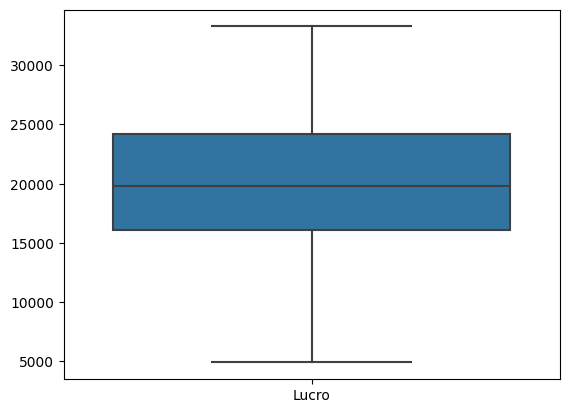

In [16]:
seaborn.boxplot(y)

<Axes: ylabel='Count'>

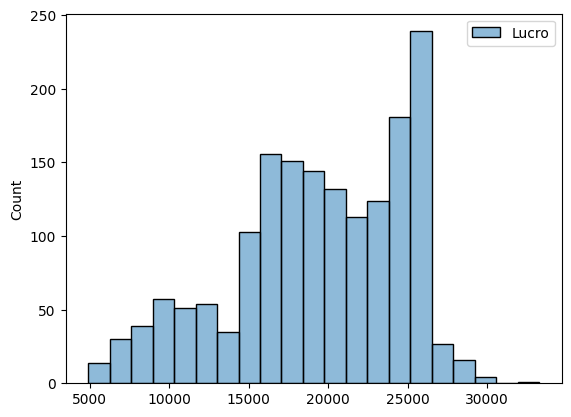

In [17]:
seaborn.histplot(y)

Analisando o erro e eliminando os valores de maior erro absoluto

<Axes: ylabel='Count'>

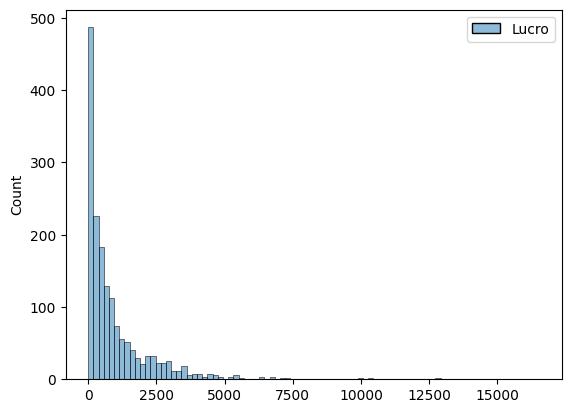

In [80]:
error=y_random-y

e=((error.abs()<1400))
abs_e=error.loc[e['Lucro']].abs()

y_corr=y.loc[abs_e.index]
X_corr=X.loc[abs_e.index]
y_erro=y.join(error.abs(),rsuffix='_erro')
y_erro_corr=y_corr.join(error.abs(),rsuffix='_erro')
seaborn.histplot(error.abs())

In [108]:
sim.set_dof(list(X.iloc[error.idxmax()].values)[0])

In [109]:
sim.profit()

28809.07031928331

<Axes: >

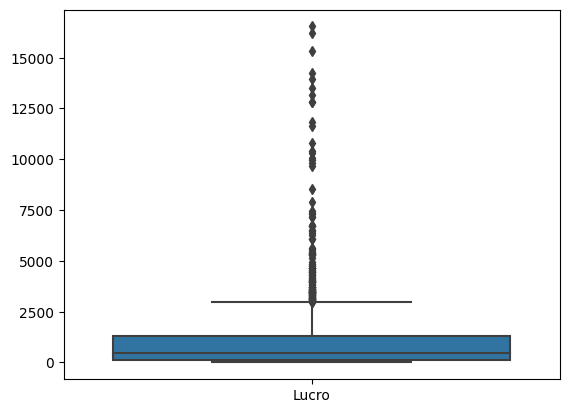

In [66]:
seaborn.boxplot(error.abs())

<Axes: xlabel='Lucro', ylabel='Lucro_erro'>

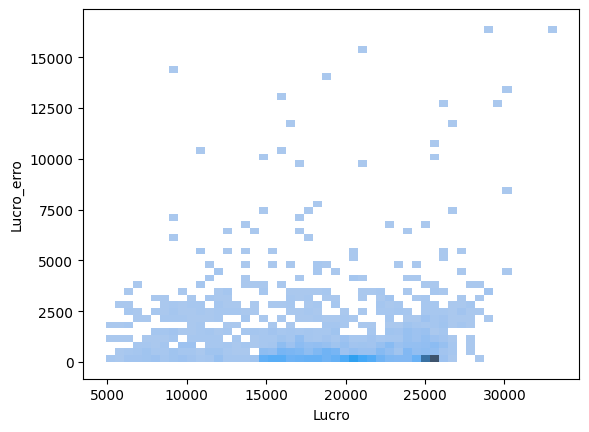

In [61]:
seaborn.histplot(y_erro,bins=50,x='Lucro',y='Lucro_erro')

Dataset da função objetivo com os maiores error retirados

<Axes: ylabel='Count'>

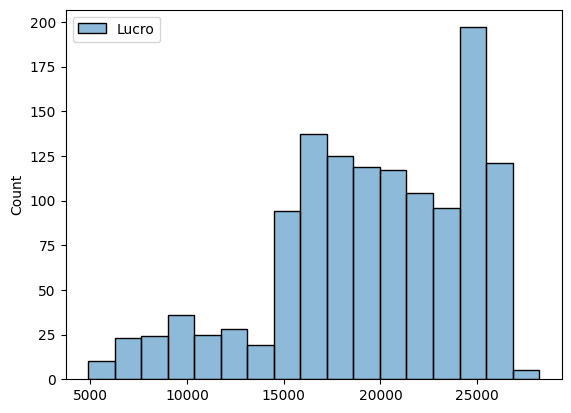

In [63]:
seaborn.histplot(y_corr)

<Axes: xlabel='Lucro', ylabel='Lucro_erro'>

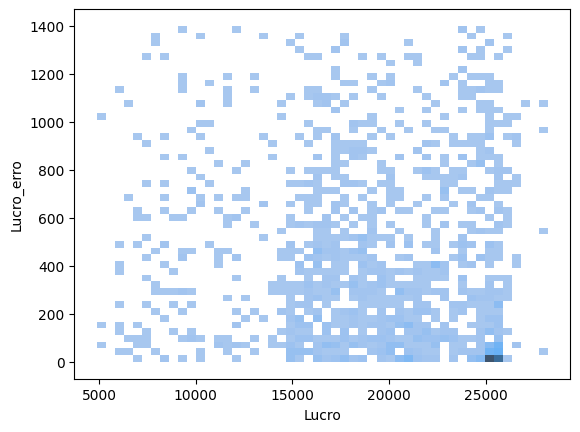

In [64]:
seaborn.histplot(y_erro_corr,bins=50,x='Lucro',y='Lucro_erro')

In [77]:
import sklearn.metrics
from sklearn import model_selection
Regressor.Regressor()._define_model()
x_train, x_test, y_train, y_test = model_selection.train_test_split(
    X_corr, y_corr, test_size=0.33
)
rs=Regressor.Regressor().fit(x_train)
models = rs._define_model()
parameters = rs._models_params()
best_params = {}
scores = {}
models_list = {}
scoring={'r2':sklearn.metrics.make_scorer(sklearn.metrics.r2_score),'neg_mean_squared_error':sklearn.metrics.make_scorer(sklearn.metrics.mean_squared_error)}

for name, model in models.items():
    if name == 'RNA':
        None
    else:
        gs = model_selection.cross_validate(
            estimator=model(),
            X=x_train,
            y=np.ravel(y_train),
            cv=3,
            scoring=scoring,
            verbose=0,)
    scores.update({name: gs["test_r2"]})
    models_list.update({name: gs})
    print("Modelo:{}\n score: {}".format(*[name, scores[name]]))

Modelo:RandomForestRegressor
 score: [0.9650756  0.97033551 0.98044336]
Modelo:GradientBoostingRegressor
 score: [0.9685667  0.96987266 0.98035318]
Modelo:XGBRFRegressor
 score: [0.96729862 0.96474977 0.97362748]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000073 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1146
[LightGBM] [Info] Number of data points in the train set: 571, number of used features: 6
[LightGBM] [Info] Start training from score 19718.240257
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be